In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as ani
from matplotlib.image import imread
import numpy as np

# Impact Crater Saturation Simulation - Part 1
## Final Project - ASTR 3750
### Name: Judit Bergfalk
### Date: November 25, 2020

In this project, impact craters are simulated on a square 500 km by 500 km surface area. Assuming impactors are striking the surface once in every 1000 years, creating a crater with a size specified by an estimated crater size distribution, the elapsed time of different percentage saturation is calculated and analyzed.

The purpose of a simulation is to understand how different properties affect the outcome of an event. It is mimicking a real situation, thus better assumptions result in better and more useful data analysis. Changing up one of the dominant parameters could result in a noticeable difference. <p>

The following program simulates impact cratering on a 500 km by 500 km surface by assuming one impact in every 1000 years. The impact velocity is 10 km/s, the mass density of the surface is 5500 $\rm kg/m^3$, the mass density of the impactor is 3000 $\rm kg/m^3$, the gravitational constant is 9.81 $\rm m/s^2$. These values are representing properties for Earth but they can be changed to simulate other planetary or moon surfaces. <p>

In the first run of the simulation, the assumption is that only craters between 10 km and 100 km are formed. In the second run, only craters between 10 km and 25 km are formed. 

## SIMULATION 1 - Changing the crater diameters to range between 10 km and 100 km

#### GENERATING RANDOM DIAMETERS

In [2]:
# Generate random diameters with given probability distribution
def SFD(x, slope, q):
    """Size-frequency distribution"""
    return slope * x**(-q)

def RandomDiameters(L1, L2, SFD=SFD, size=1, slope=1, q=3, control=1e6):
    """Generating random diameters in km with given probability distribution.
    
       Parameters
       ----------
           L1 : float
               Lower limit of the impactor diameter in km
           L2 : float
               Upper limit of the impactor diameter in km
           SFD : function
               Probability distribution function with the option to change the slope and y-intercept
               Format: slope * x^(-q)
               Default is the function SFD
           slope : float
               Slope of the probability function
               Default is 1
           q : float
               y-intercept of the probability function
               q >= 2 for a reasonable distribution
               Default is 3
           size : float
               Number of impactors
               Default is 1
           control : float
               Number of max calculations to avoid computer crash
               Default is 10^6
           
       Returns
       -------
           Random diameters in km: np.array
       
       Example
       -------
           Generate 10 impactors between 10 km and 100 km diameter with given SFD:
           >> print(RandomDiameters(10,100,size=10))
           >> [40.49 14.8  13.21 90.74 22.48 49.47 22.85 10.83 10.72 11.12]
    """
       
    N = []                                 # list of random numbers
    count = 0                              # counter
    assert q > 2  
    while len(N) < size and count < control:
        x = np.random.uniform(low=L1,high=L2)
        x = np.round(x,2)                  # round to two decimals
        function = SFD(x,slope,q)      # define function
        if np.random.uniform(0,1) <= function:
            N += [x]
        count += 1
    N = np.array(N)
    return N
print(RandomDiameters(10,100,size=10))

[10.67 21.67 15.3  13.27 26.08 13.37 15.88 10.45 22.29 12.49]


#### FINDING IMPACTOR SIZES FROM CRATER DIAMETERS

In [3]:
# Calculate crater sizes 
def CraterCalculator(D, v_i=10000, g=9.81, rho_p=3000, rho_t=5500):
    """Calculating the size of the impactors from the size of a crater.
       
       Parameters
       ----------
           D : float
               Diameters of craters in km
           v_i : float
               Impact velocity in m/s
               Default is 10 km/s
           g : float
               Gravitational constant in m/s^2
               Default is 9.81 m/s^2
           rho_p : float
               Mass density of impactor in kg/m^3
               Default is 3000 kg/m^3
           rho_t : float
               Mass density of surface in kg/m^3
               Default is 5500 kg/m^3
           
       Returns
       -------
           Diameter of impactor in km: float
       
       Example
       -------
           What diameter of impactor makes 10 km craters?
           >> print(CraterCalculator(10))
           >> 1.22
    """
    D = D*1000           # convert km to m
    L = (g/v_i**2)**(1/3) * (rho_t/rho_p)**(1/3) * D**(4/3)
    L = L/1000           # convert m to km
    L = np.round(L,2)    # round to two decimals
    return L
print(CraterCalculator(10))

1.22


#### GENERATING RANDOM CRATER DIAMETERS

In [4]:
# Calculate random crater sizes
def CraterCreator(low, high, SFD=SFD, size=1, 
                  v_i=10000, g=9.81,
                  rho_p=3000, rho_t=5500,
                  slope=1, q=3):
    """Creating craters from random diameter impactors, given lower and upper limit of crater sizes.
       
       Parameters
       ----------
           low : float
               Lower limit for crater diameter in km
           high : float
               Upper limit for crater diameter in km
           SFD : function
               Probability distribution function with the option to change the slope and y-intercept
               Format: slope * x^(-q)
               Default is the function SFD
           size : float
               Number of impactors
               Default is 1
           v_i : float
               Impact velocity in m/s
               Default is 10 km/s
           g : float
               Gravitational constant in m/s^2
               Default is 9.81 m/s^2
           rho_p : float
               Mass density of impactor in kg/m^3
               Default is 3000 kg/m^3
           rho_t : float
               Mass density of surface in kg/m^3
               Default is 5500 kg/m^3
           slope : float
               Slope of the probability function
               Default is 1
           q : float
               y-intercept of the probability function
               q >= 2 for a reasonable distribution
               Default is 3
           
       Returns
       -------
           List of crater diameters in km : np.array
       
       Example
       -------
           Generate 10 craters between 10 km and 100 km diameters.
           >> print(CraterCreator(10,100,size=10))
           >> [11.94 15.12 17.63 11.05 10.27 10.81 10.09 27.74 10.15 13.36]

    """
    # Finding the lower limit of impactors from given lower limit of crater size
    L1 = CraterCalculator(low,v_i=v_i,g=g,rho_p=rho_p,rho_t=rho_t)
    # Finding the upper limit of impactors from given lower limit of crater size
    L2 = CraterCalculator(high,v_i=v_i,g=g,rho_p=rho_p,rho_t=rho_t)
    
    # Generate random diameter impactors
    randomimpactors = RandomDiameters(L1,L2,SFD=SFD,size=size,slope=slope,q=q)
    # Convert km to m
    randomimpactors = randomimpactors*1000
    
    # Calculate crater diameters
    D = (v_i**2/g)**(1/4) * (rho_p/rho_t)**(1/4) * randomimpactors**(3/4)
    D = np.round(D/1000,2)             # Convert m to km and round to two decimals
    return D
print(CraterCreator(10,100,size=10))

[17.43 19.19 17.94 44.87 12.23 27.21 13.53 11.88 11.53 10.93]


#### CRATER SIZE DISTRIBUTION

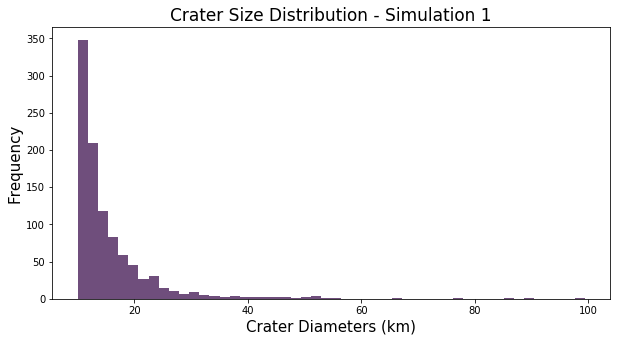

In [5]:
# Plot crater distribution
plt.figure(figsize=(10.0,5.0))
plt.hist(CraterCreator(10,100,size=1000), bins=50, color="#6f4e7c")
plt.title("Crater Size Distribution - Simulation 1", fontsize="17")
plt.xlabel("Crater Diameters (km)", fontsize="15")
plt.ylabel("Frequency", fontsize="15")
plt.show()

#### GENERATE RANDOM VALUES FOR SIMULATION

In [6]:
# Random position and crater size generator
def RandomPositionAndArea(D1, D2, N=3000,
                          xlimlow=0.0, xlimhigh=500.0,
                          ylimlow=0.0, ylimhigh=500.0,
                          dpi=72, SFD=SFD, 
                          v_i=10000, g=9.81,
                          rho_p=3000, rho_t=5500, 
                          slope=1, q=3):
    """Random position and crater size generator.
    
       Parameters
       ----------
           D1 : float
               Lower limit for crater diameter in km
           D2 : float
               Upper limit for crater diameter in km
           N : integer
               Number of values generated
               Default is 3000 
           xlimlow : float
               Lower limit of x-positions
               Default is 0.0
           xlimhigh : float
               Upper limit of x-positions
               Default is 500.0
           ylimlow : float
               Lower limit of y-positions
               Default is 0.0
           ylimhigh : float
               Upper limit of y-positions
               Default is 500.0
           dpi : float
               Dots per inch of the plot
               Default is 72
           SFD : function
               Probability distribution function with the option to change the slope and y-intercept
               Format: slope * x^(-q)
               Default is the function SFD
           v_i : float
               Impact velocity in m/s
               Default is 10 km/s
           g : float
               Gravitational constant in m/s^2
               Default is 9.81 m/s^2
           rho_p : float
               Mass density of impactor in kg/m^3
               Default is 3000 kg/m^3
           rho_t : float
               Mass density of surface in kg/m^3
               Default is 5500 kg/m^3
           slope : float
               Slope of the probability function
               Default is 1
           q : float
               y-intercept of the probability function
               q >= 2 for a reasonable distribution
               Default is 3
                      
       Returns
       -------
           Uniform random x-positions, y-positions and crater sizes. 
       """

    # Rescale crater sizes for a 500x500 plot
    scale = dpi 
    relativecraters = scale * (CraterCreator(D1,D2,SFD=SFD,size=N,v_i=v_i,
                                                   g=g,rho_p=rho_p,rho_t=rho_t,
                                                   slope=slope,q=q))

    # Calculate random positions and craters sizes
    xposition = np.random.uniform(low=xlimlow, high=xlimhigh, size=N)
    yposition = np.random.uniform(low=ylimlow, high=ylimhigh, size=N)
    return xposition, yposition, relativecraters

#### CRATER SIMULATION

The focal point of this project is the CraterSimulation function that simulates craters between a range of diameters on a surface and calculates the percentage of saturation. The function then outputs the times of saturation, the randomly generated positions and crater sizes. 

In [7]:
# Loop 
def CraterSimulation(D1, D2, N=3000,
                     xlimlow=0.0, xlimhigh=500.0,
                     ylimlow=0.0, ylimhigh=500.0, 
                     dpi=72, SFD=SFD,
                     v_i=10000, g=9.81,
                     rho_p=3000, rho_t=5500,
                     slope=1, q=3):
    """Simulating craters on a given surface area and calculating the times of saturation. 
       Returns lists of values.
      
       Parameters
       ----------
           D1 : float
               Lower limit for crater diameter in km
           D2 : float
               Upper limit for crater diameter in km
           N : integer
               Number of values generated
               Default is 3000 
           xlimlow : float
               Lower limit of x-positions
               Default is 0.0
           xlimhigh : float
               Upper limit of x-positions
               Default is 500.0
           ylimlow : float
               Lower limit of y-positions
               Default is 0.0
           ylimhigh : float
               Upper limit of y-positions
               Default is 500.0
           dpi : float
               Dots per inch of the plot
               Default is 72
           SFD : function
               Probability distribution function with the option to change the slope and y-intercept
               Format: slope * x^(-q)
               Default is the function SFD
           size : float
               Number of impactors
               Default is 1
           v_i : float
               Impact velocity in m/s
               Default is 10 km/s
           g : float
               Gravitational constant in m/s^2
               Default is 9.81 m/s^2
           rho_p : float
               Mass density of impactor in kg/m^3
               Default is 3000 kg/m^3
           rho_t : float
               Mass density of surface in kg/m^3
               Default is 5500 kg/m^3
           slope : float
               Slope of the probability function
               Default is 1
           q : float
               y-intercept of the probability function
               q >= 2 for a reasonable distribution
               Default is 3
           
       Returns
       -------
           List of x and y values and craters sizes at 25%, 50%, 75% and 100% saturation : list
           List of times of saturation and the number of craters : list
           List of the used random x and y positions and crater sizes

    """
    # Plot
    fig = plt.figure(figsize=(6.0,6.0),dpi=dpi)
    
    # Saving the times of saturation
    nsat25, nsat50, nsat75, nsat100 = [],[],[],[]

    # Store positions at the times of saturation
    position25, position50, position75, position100 = [],[],[],[]
    
    # Store saturation
    saturationvalues = []
    
    # Extract position and crater size values
    xposition, yposition, cratersizes = RandomPositionAndArea(D1, D2, N=N,
                                                              xlimlow=xlimlow, xlimhigh=xlimhigh,
                                                              ylimlow=ylimlow, ylimhigh=ylimhigh,
                                                              dpi=dpi, SFD=SFD, 
                                                              v_i=v_i, g=g,
                                                              rho_p=rho_p, rho_t=rho_t, 
                                                              slope=slope, q=q)
    
    # Create an array (same length as the plot array below) 
    # representing the saturated surface with all values equal to 255
    satsurface = 255*np.ones(559872)

    # Loop
    saturation = 0
    time = 0
    indices = list(range(len(xposition)))
    for i,x,y,area in zip(indices,xposition,yposition,cratersizes):
        
        # Count time
        time += 1000
        
        # Plot
        plt.scatter(x, y, s=area, c='black', alpha=1, marker='o')
        plt.xlim(xlimlow,xlimhigh)
        plt.ylim(ylimlow,ylimhigh)
        fig.tight_layout(pad=0)
        plt.axis('off')

        # Plot figure to RGB array
        fig.canvas.draw()
        figarray = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

        # Crater plot to array, 0 for white and 255 for black (reverse order than in general)
        craterfig = 255-figarray

        # Calculate percentage of saturation on surface
        saturation = np.sum(craterfig)/np.sum(satsurface)
        saturationvalues.append(saturation)

        # Save saturated surface image for 25%, 50%, 75% and 100%
        if saturation > 0.25:
            if len(nsat25)==0:
                position25.append(i)
                nsat25.append(time)
                nsat25.append(saturation)
                print(saturation)
                print(i)
                print("mark 25%")

        if saturation > 0.50:
            if len(nsat50)==0:
                position50.append(i)
                nsat50.append(time)
                nsat50.append(saturation)
                print(saturation)
                print(i)
                print("mark 50%")

        if saturation > 0.75:
            if len(nsat75)==0:
                position75.append(i)
                nsat75.append(time)
                nsat75.append(saturation)
                print(saturation)
                print(i)
                print("mark 75%")
            
        if saturation == 1.0:
            if len(nsat100)==0:
                position100.append(i)
                nsat100.append(time)
                nsat100.append(saturation)
                print(saturation)
                print(i)
                print("mark 100%")
                break
          
    return position25,position50,position75,position100,nsat25,nsat50,nsat75,nsat100,xposition,yposition,cratersizes,saturationvalues;

0.25215406378600824
56
mark 25%
0.5002518432784636
134
mark 50%
0.7503590106310014
270
mark 75%
1.0
2370
mark 100%


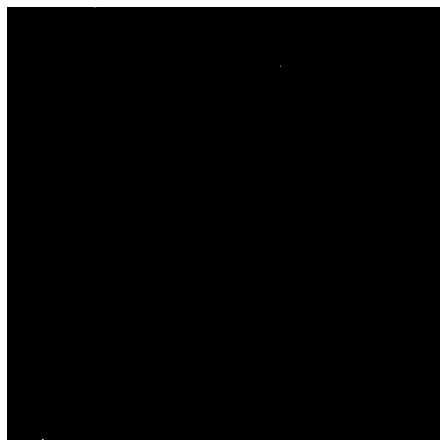

In [8]:
# Calling the CraterSimulation function
cratersim_values = CraterSimulation(10,100)

In [9]:
# Assigning names to the extracted values
position25 = cratersim_values[0]
position50 = cratersim_values[1]
position75 = cratersim_values[2]
position100 = cratersim_values[3]

nsat25time = cratersim_values[4][0]
nsat25sat = cratersim_values[4][1]
nsat50time = cratersim_values[5][0]
nsat50sat = cratersim_values[5][1]
nsat75time = cratersim_values[6][0]
nsat75sat = cratersim_values[6][1]
nsat100time = cratersim_values[7][0]
nsat100sat = cratersim_values[7][1]

xposition = cratersim_values[8]
yposition = cratersim_values[9]
cratersizes = cratersim_values[10]
saturationvalues = cratersim_values[11]

xvalues25 = xposition[:position25[0]]
yvalues25 = yposition[:position25[0]]
cratersizes25 = cratersizes[:position25[0]]
xvalues50 = xposition[:position50[0]]
yvalues50 = yposition[:position50[0]]
cratersizes50 = cratersizes[:position50[0]]
xvalues75 = xposition[:position75[0]]
yvalues75 = yposition[:position75[0]]
cratersizes75 = cratersizes[:position75[0]]
xvalues100 = xposition[:position100[0]]
yvalues100 = yposition[:position100[0]]
cratersizes100 = cratersizes[:position100[0]]

#### CHANGES IN SATURATION FOR INDIVIDUAL CRATER SIZES

In [10]:
# Sizes of craters vs saturation changes
def SaturationChanges(cratersizes):
    """Calculating saturation changes for each individual crater sizes generated during the simulation.
    
       Parameters
       ----------
           cratersizes : list or float
               List or float of crater sizes in km generated in the simulation
           
       Returns
       -------
           A list of the changes in saturation for each individual crater sizes.
           
       Example
       -------
           How much does the saturation of a surface change when a 10 km crater is created?
           >> print(SaturationChanges([10]))
           >> [0.00011252572016460906]
           
    """

    satchanges = []
    fig = plt.figure(figsize=(6.0,6.0))  
    for craters in cratersizes:

        plt.cla()
        plt.scatter(250, 250, s=craters, c='black', alpha=1)
        plt.xlim(0,500)
        plt.ylim(0,500)
        fig.tight_layout(pad=0)
        plt.axis('off')

        # Plot figure to RGB array
        fig.canvas.draw()
        figarray = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

        # Crater plot to array, 0 for white and 255 for black (reverse order than in general)
        craterfig = 255-figarray

        # Calculate percentage of saturation on surface
        satsurface = 255*np.ones(len(craterfig))
        saturation = np.sum(craterfig)/np.sum(satsurface)
        satchanges.append(saturation)

    plt.clf()
    return satchanges
print(SaturationChanges([10]))

[0.00011252572016460906]


<Figure size 432x432 with 0 Axes>

To determine if a crater is recognizable on the surface, the CraterCount function analyzes the changes in saturation and determines if the change is large enough to count a new crater on the surface. It is assumed that a crater is erased by another crater if the change in saturation is less than 25\%.  

In [11]:
# How to determine that a crater is recognizable on a surface
def CraterCount(saturationvalues,satchanges):
    """Counting the craters over time by measuring the change in saturation.
    
       Parameters
       ----------
           saturationvalues : list
               List of surface saturation percentages generated during simulation
           satchanges : list
               List of changes is saturation for each individual crater sizes
           
       Returns
       -------
           A list of craters counted over time during the simulation."""

    # Store crater count
    cratersovertime = []

    cratercount = 0
    indices = list(range(len(saturationvalues)))
    prev_sat = 0

    for i,saturation,changes in zip(indices,saturationvalues,satchanges):

        # Difference in saturation
        diff_sat = saturation - prev_sat

        # Difference between changes in saturation
        diff_change_sat = diff_sat / changes

        # If the changes are more than 25%
        if diff_change_sat >= 0.25:
            cratercount += 1

        prev_sat = saturation    
        cratersovertime.append(cratercount)
        
    return cratersovertime

In [12]:
# Crater counting
satchanges = SaturationChanges(cratersizes)
cratersovertime = CraterCount(saturationvalues,satchanges)

<Figure size 432x432 with 0 Axes>

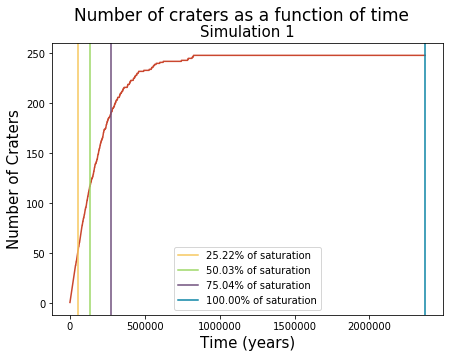

In [13]:
# Plot number of craters as a function of time
plt.figure(figsize=(7.0,5.0))

# Define values from above simulation
time = np.linspace(0,1000*len(cratersovertime),len(cratersovertime))

plt.plot(time,cratersovertime, color="#ca472f")
plt.axvline(nsat25time, label="{:.2f}% of saturation".format(nsat25sat*100), color="#f6c85f")
plt.axvline(nsat50time, label="{:.2f}% of saturation".format(nsat50sat*100), color="#9dd866")
plt.axvline(nsat75time, label="{:.2f}% of saturation".format(nsat75sat*100), color="#6f4e7c")
plt.axvline(nsat100time, label="{:.2f}% of saturation".format(nsat100sat*100), color="#0b84a5")
plt.suptitle("Number of craters as a function of time", fontsize="17")
plt.title("Simulation 1", fontsize="15")
plt.xlabel("Time (years)", fontsize="15")
plt.ylabel("Number of Craters", fontsize="15")
plt.legend()
plt.show()

For a visual representation of the surface with different times of saturation, the SaveSaturation functions saves the plot in a png format. 

In [14]:
# Save saturation 
def SaveSaturation(n,x,y,cratersizes,saturation,time,cratercount,dpi=72):
    """Creates plots of the surface at different saturation times from previously calculated data, 
        then saves it to a png file.
        
       Parameters
       ----------
           n : integer
               number of run
           x : list
               List of random x positions on a plot at different times of saturation, extracted from function
           y : list
               List of random y positions on a plot at different times of saturation, extracted from function
           cratersizes : list
               List of random crater sizes on a plot at different times of saturation, extracted from function
           saturation : float
               Percentage of saturation for the title of the plot, extracted from function
           time : float
               List of time, extracted from function
           cratercount : list
               Crater count, used for the time in the title of the plot, extracted from function
           dpi : float
               Dots per inch of the plot
               Default is 72
           
       Returns
       -------
           Saved png image of plot."""
    fig = plt.figure(figsize=(6.0,6.0),dpi=dpi)
    plt.style.use('default')
    ax = plt.gca()
    ax.set_facecolor('xkcd:slate grey')
    plt.scatter(x, y, s=cratersizes, c='#f0f0f0', alpha=0.75, linewidth=2, marker='o')
    plt.suptitle("Saturation = {:.3f}%".format(saturation*100), fontsize="19")
    plt.title("Duration = {:.2e} years, {} Visible Craters.".format(time,cratercount[int(time/1000 - 1)]), fontsize="17")
    plt.xlim(0,500)
    plt.ylim(0,500)
    fig.savefig('craters{}-{}.png'.format(n,np.round(np.int(saturation*100))))
    plt.clf();

In [15]:
# 25%
SaveSaturation(1,xvalues25,yvalues25,cratersizes25,nsat25sat,nsat25time,cratersovertime);

# 50%
SaveSaturation(1,xvalues50,yvalues50,cratersizes50,nsat50sat,nsat50time,cratersovertime);

# 75%
SaveSaturation(1,xvalues75,yvalues75,cratersizes75,nsat75sat,nsat75time,cratersovertime);

# 100%
SaveSaturation(1,xvalues100,yvalues100,cratersizes100,nsat100sat,nsat100time,cratersovertime);

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

The surface with random craters at 25%, 50%, 75% and 100% saturation are shown below.

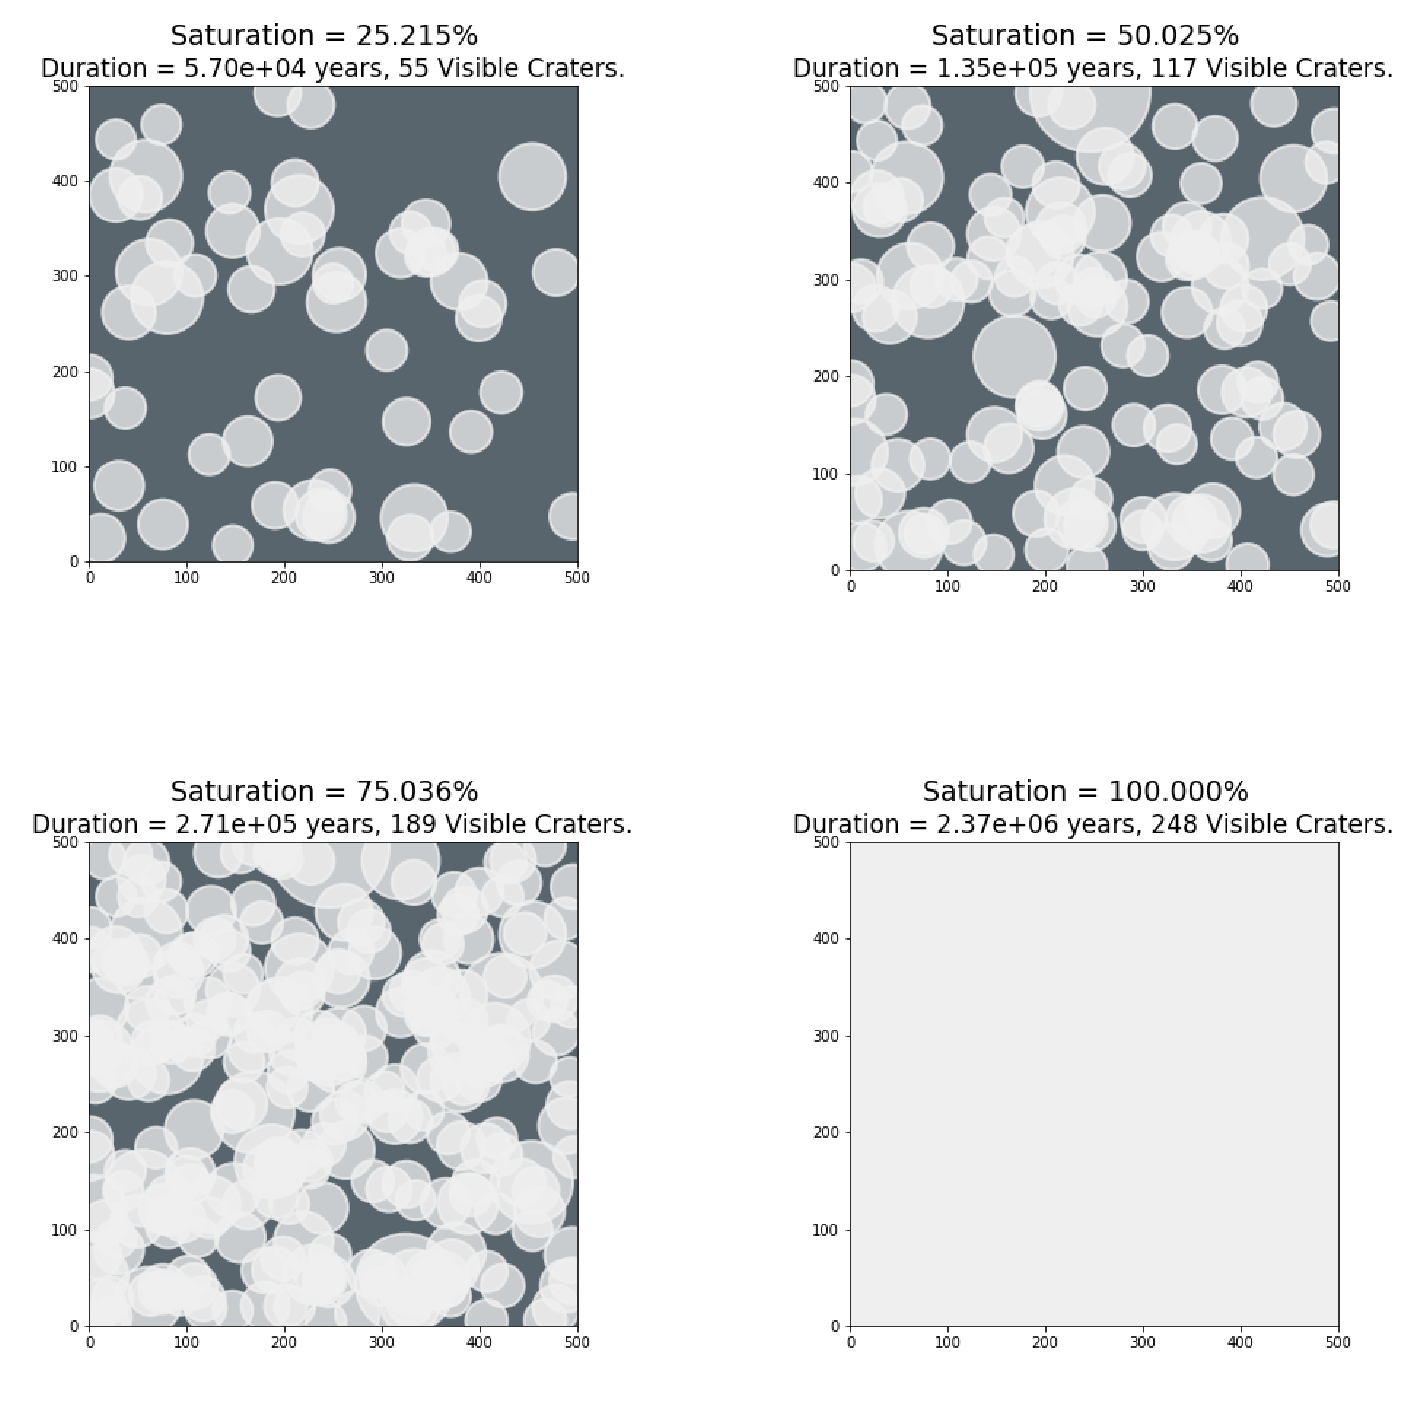

In [16]:
# Display percentage saturation on surface
fig2 = plt.figure(figsize=(18.0,18.0))
images = ['craters1-25.png','craters1-50.png','craters1-75.png','craters1-100.png']
for i in range(4):
    fig2.add_subplot(2,2,i+1)
    image = imread(images[i])
    plt.imshow(image)
    plt.axis('off')

In [17]:
# Making a movie
def ImpactMovie(n,xposition,yposition,cratersizes,saturationvalues,time,cratercount):
    """Makes a movie about the impact simulation.
        
       Parameters
       ----------
           n : integer
               number of run
           xposition : list
               List of random x positions on a plot at different times of saturation, extracted from function
           yposition : list
               List of random y positions on a plot at different times of saturation, extracted from function
           cratersizes : list
               List of random crater sizes on a plot at different times of saturation, extracted from function
           saturationvalues : list
               Percentage of saturation calculated during simulation, extracted from function
           time : float
               List of time, extracted from function
           cratercount : list
               Crater count, used for the time in the title of the plot, extracted from function
           dpi : float
               Dots per inch of the plot
               Default is 72
           
       Returns
       -------
           Saved png image of plot.
       """
    
    writer = ani.FFMpegWriter(fps=25)

    fig = plt.figure(figsize=(6.0,6.0),dpi=72)

    with writer.saving(fig, 'Craters{}.mp4'.format(n), 100):

        count = 1
        # loop 
        for x,y,craters,time,sat,cratercount in zip(xposition,yposition,cratersizes,time,saturationvalues,cratercount):
            
            ax = plt.gca()
            ax.set_facecolor('xkcd:slate grey')
            plt.scatter(x, y, s=craters, c='#f0f0f0', alpha=0.75, linewidth=2, marker='o')
            plt.suptitle("Duration = {:.2e} years".format(time))
            plt.title("Saturation = {:.3f}%, {} Visible Craters.".format(sat*100,cratercount))
            plt.xlim(0,500)
            plt.ylim(0,500)
            # save the current plot as a movie frame
            writer.grab_frame()
            count += 1

In [ ]:
ImpactMovie(1,xposition,yposition,cratersizes,saturationvalues,time,cratersovertime)